## Homework

> **Note**: it's very likely that in this homework your answers won't match 
> the options exactly. That's okay and expected. Select the option that's
> closest to your solution.

### Dataset

In this homework, we'll build a model for classifying various hair types. 
For this, we will use the Hair Type dataset that was obtained from 
[Kaggle](https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset) 
and slightly rebuilt. 


In [38]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
# !unzip data.zip

### Reproducibility

Reproducibility in deep learning is a multifaceted challenge that requires attention 
to both software and hardware details. In some cases, we can't guarantee exactly 
the same results during the same experiment runs. Therefore, in this homework we suggest to:
* install tensorflow version 2.17.1
* set the seed generators by:

In [39]:
import numpy as np
import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

For this will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(200, 200, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).


### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`


binary crossentropy

In [40]:
from tensorflow import keras

In [41]:
inputs = keras.Input(shape = (200, 200, 3))
x = keras.layers.Conv2D(32, kernel_size = (3, 3), activation = "relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size = (2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation = "relu")(x)
outputs = keras.layers.Dense(1, activation = "sigmoid")(x)
model = keras.models.Model(inputs, outputs)

In [42]:
optimizer = keras.optimizers.SGD(learning_rate = 0.002, momentum = 0.8)
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

* 896 
* 11214912
* 15896912
* 20072512

In [43]:
model.count_params()

20073473

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
train_data = ImageDataGenerator(rescale = 1./255)
train_gen = train_data.flow_from_directory(
    "data/train",
    target_size = (200, 200),
    class_mode = "binary",
    batch_size = 20,
    shuffle = True
)

Found 800 images belonging to 2 classes.


In [46]:
test_data = ImageDataGenerator(rescale=1./255)
test_gen = test_data.flow_from_directory(
    "data/test",
    target_size = (200, 200),
    class_mode = "binary",
    batch_size = 20,
    shuffle = True
)

Found 201 images belonging to 2 classes.


In [47]:
history = model.fit(
    train_gen,
    epochs = 10,
    validation_data = test_gen
)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5951 - loss: 0.6817 - val_accuracy: 0.6318 - val_loss: 0.6339
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7018 - loss: 0.5876 - val_accuracy: 0.5771 - val_loss: 0.6533
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.7044 - loss: 0.5611 - val_accuracy: 0.5721 - val_loss: 0.7094
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.7184 - loss: 0.5444 - val_accuracy: 0.6368 - val_loss: 0.6132
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.7323 - loss: 0.5093 - val_accuracy: 0.6866 - val_loss: 0.5847
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7463 - loss: 0.5053 - val_accuracy: 0.6617 - val_loss: 0.6253
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.7648 - loss: 0.4746 - val_accuracy: 0.6816 - val_loss: 0.5782
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.7738 - loss: 0.4615 - val_accuracy: 0.

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.10
* 0.32
* 0.50
* 0.72

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

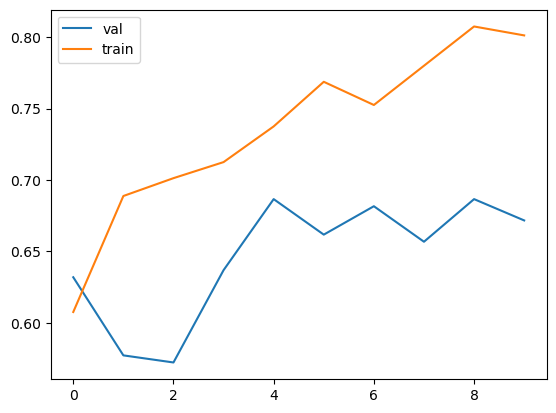

In [49]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()

In [50]:
round(np.median(history.history["accuracy"]), 2)

np.float64(0.75)

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.028
* 0.068
* 0.128
* 0.168

In [51]:
round(np.std(history.history["loss"]), 2)

np.float64(0.07)

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [52]:
augmented_train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [53]:
augmented_train_generator = augmented_train_datagen.flow_from_directory(
    "data/train",
    target_size = (200, 200),
    batch_size = 20,
    shuffle = True,
    class_mode = "binary",
)

Found 800 images belonging to 2 classes.


In [54]:
history_aug = model.fit(
    augmented_train_generator,
    epochs = 10,
    validation_data = test_generator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 0.6820 - loss: 0.5843 - val_accuracy: 0.7313 - val_loss: 0.5454
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.7081 - loss: 0.5598 - val_accuracy: 0.7512 - val_loss: 0.5426
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.7140 - loss: 0.5739 - val_accuracy: 0.7214 - val_loss: 0.5355
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.6926 - loss: 0.5785 - val_accuracy: 0.7264 - val_loss: 0.5418
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.7004 - loss: 0.5608 - val_accuracy: 0.7363 - val_loss: 0.5431
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.6800 - loss: 0.5690 - val_accuracy: 0.7313 - val_loss: 0.5372
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.7198 - loss: 0.5561 - val_accuracy: 0.7264 - val_loss: 0.5627
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - accuracy: 0.7256 - loss: 0.5245 - val_accu

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.26
* 0.56
* 0.86
* 1.16

In [55]:
round(np.mean(history_aug.history["val_loss"]), 2)

np.float64(0.54)

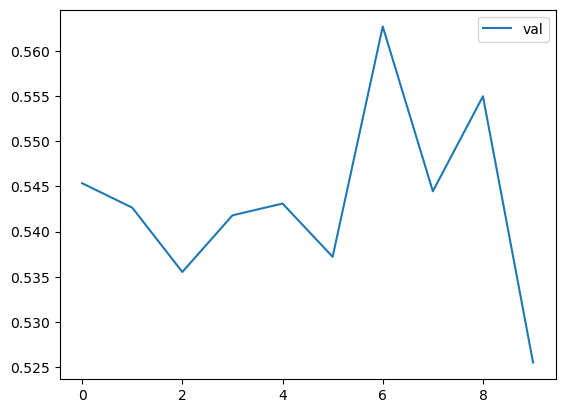

In [56]:
hist_aug = history_aug.history
plt.plot(hist_aug['val_loss'], label='val')
plt.legend()

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.31
* 0.51
* 0.71
* 0.91

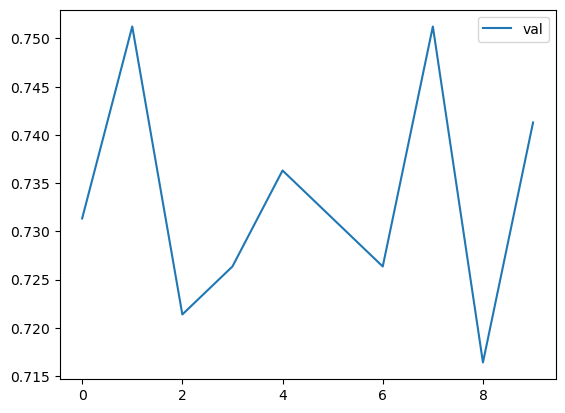

In [57]:
hist_aug = history_aug.history
plt.plot(hist_aug['val_accuracy'], label='val')
plt.legend()

In [58]:
round(np.mean(history_aug.history["val_accuracy"][-5:]), 2)

np.float64(0.73)